In [ ]:
# Importing Libraries Used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Connecting Google Drive to access notebook remotely
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Hide unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Pre-Processing of Calls Data

In [ ]:
# calls data read csv
calls=pd.read_csv('/content/drive/My Drive/United_Airlines_Copy/Copy_calls.csv')

In [ ]:
# Changing the date time column into datetime format
calls['call_start_datetime']=pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime']=pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime']=pd.to_datetime(calls['call_end_datetime'])

In [ ]:
# Calculating Handling Time and Speed to Answer Time for each call id
calls['handling_time']=(calls['call_end_datetime']-calls['agent_assigned_datetime']).dt.total_seconds()/60
calls['speed_to_answer_time (in minutes)']=(calls['agent_assigned_datetime']-calls['call_start_datetime']).dt.total_seconds()/60

# **Customers Data**

In [ ]:
# customers data read csv
customers=pd.read_csv('/content/drive/My Drive/United_Airlines_Copy/Copy_customers.csv')


In [ ]:
# Joined Customers data and calls data
customer_calls=pd.merge(calls,customers,on='customer_id')

# Factors Responsible for High AHT & AST
Several factors can contribute to higher Average Handle Time (AHT) and Average Speed to Answer (AST) in call centers.

We have considered some tentative factors that could be responsible for high AST and AHT.
Understanding these factors can help improve customer service and efficiency in handling calls.

#**Elite level code VS AHT & AST**
First, the Elite Level Code, which indicates a customer's membership status, plays a significant role; members with higher status may have more complex inquiries that may require longer handling and speed to answer times.


In [ ]:
# Group the combined data by elite level code and then calculate the AST
group_by_level_code=customer_calls.groupby('elite_level_code')[['speed_to_answer_time (in minutes)','handling_time']].mean()
group_data_by_level_code=group_by_level_code.reset_index()
group_data_by_level_code['speed_to_answer_time (in minutes)']=group_data_by_level_code['speed_to_answer_time (in minutes)'].round(2)

# group the combined data by elite level code and then calculates the average handling time
group_data_by_level_code['handling_time']=group_data_by_level_code['handling_time'].round(2)

group_data_by_level_code.rename(columns={
    "speed_to_answer_time (in minutes)": "Average_Answer_Type (in mins)",
    "handling_time": "Average_Handling_Time (in mins)"
}, inplace=True)

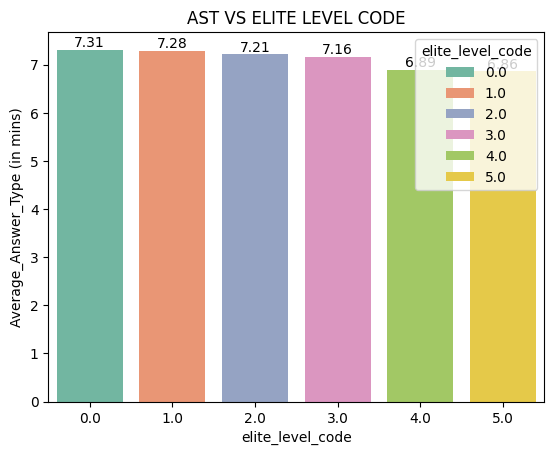

In [ ]:
# Create a bar plot to show AST vs Elite Level Code
ast_plot = sns.barplot(
    x='elite_level_code',
    y='Average_Answer_Type (in mins)',
    data=group_data_by_level_code,  # The DataFrame containing the data
    hue='elite_level_code',  # Different colors for each elite level code
    palette='Set2'  # Color palette for the bars
)

# Annotate each bar with its value for better readability
for i in ast_plot.containers:
    ast_plot.bar_label(i)

plt.title("AST VS ELITE LEVEL CODE")
# Show the plot
plt.show()

The above graph indicates that as the membership status of the customer increases, the average speed to answer time decreases. This trend suggests that customers with higher membership levels may receive prioritized service, leading to faster response times when they reach out for assistance. It highlights the effectiveness of call centers in addressing the needs of elite members promptly, likely due to their enhanced loyalty and value to the company. As these members have access to exclusive benefits and services, call centers may allocate more resources or skilled agents to handle their inquiries quickly.

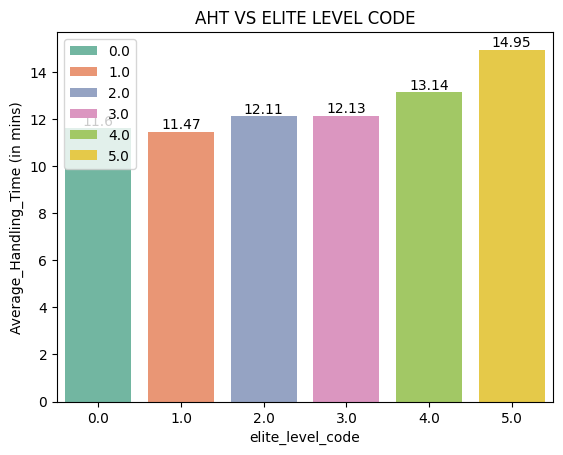

In [ ]:
# Create a bar plot to show AHT vs Elite Level Code
aht_plot=sns.barplot(x='elite_level_code',y='Average_Handling_Time (in mins)',data=group_data_by_level_code,hue='elite_level_code',palette='Set2')

for i in aht_plot.containers:
    aht_plot.bar_label(i)

plt.title("AHT VS ELITE LEVEL CODE")
plt.legend(loc=2)
plt.show()

The above graph indicates that as the membership status of the customer increases, the average handling time also increases. This observation suggests that customers with higher membership levels often present more complex inquiries or requests that require more in-depth discussions and solutions. As these elite members may be utilizing their membership benefits, they could be seeking assistance with specialized services, upgrades, or issues that require detailed explanations.

# **Analysing Time and Day of Calling**

Additionally, the time and day of calling can impact these metrics, as certain times may see higher call volumes, leading to longer wait times and extended conversations.

In [ ]:
# Time of first call
min_time=calls['call_start_datetime'].min()

# Time of the last call ended
max_time=calls['call_end_datetime'].max()


In [ ]:
# Extracting the hour of call from calls data
calls['hour']=calls['call_start_datetime'].dt.hour

# Extracting the day when call made from calls data
calls['day']=calls['call_end_datetime'].dt.day_name()

# Count of Number of Calls on Different Days and at Different Time Intervals

In [ ]:
time_array = [(0,3),(3,6),(6,9),(9,12),(12,15),(15,18),(18,21),(21,24)]
day_array = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
arr2 = []  # Initialize arr2 as an empty list

for i in range(8):
    arr = []  # Move arr initialization here
    for j in range(7):
        # Count call IDs based on the hour and day conditions
        a = calls[(calls['hour'] >= time_array[i][0]) & (calls['hour'] < time_array[i][1]) & (calls['day'] == day_array[j])]['call_id'].count()
        arr.append(a)

    # Append the arr list to arr2 after each inner loop completes
    arr2.append(arr)

arr2  # Output arr2 to check the final result

call_volume = pd.DataFrame(arr2, columns=day_array,)
call_volume.index = [f'{start}-{end}' for start, end in time_array]

# Display the DataFrame
call_volume

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0-3,211,257,247,288,311,1126,885
3-6,238,239,238,291,297,1084,847
6-9,576,583,563,700,719,2625,2127
9-12,1110,1177,1141,1463,1423,5242,4208
12-15,1162,1128,1106,1457,1406,5188,4225
15-18,1178,1109,1117,1372,1426,5252,4186
18-21,486,517,522,645,661,2310,1791
21-24,301,248,234,301,301,1073,892


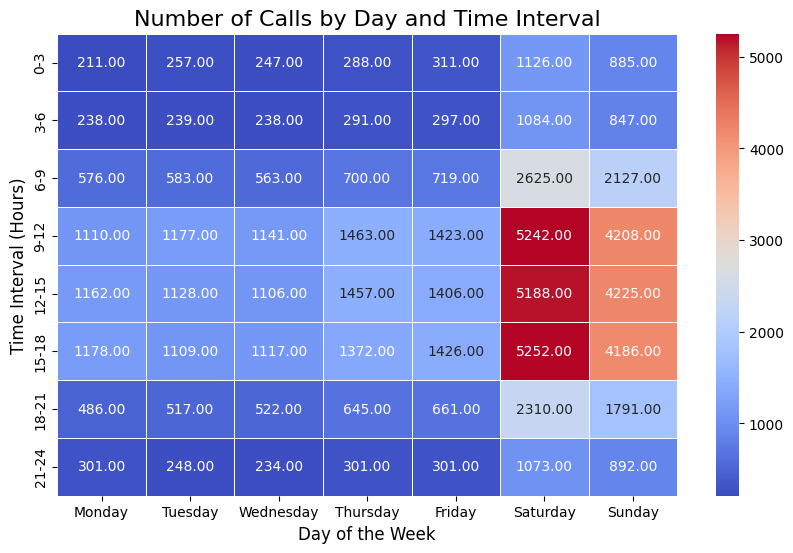

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn
sns.heatmap(call_volume, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

# Add titles and labels
plt.title('Number of Calls by Day and Time Interval', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Time Interval (Hours)', fontsize=12)

# Show the plot
plt.show()

The above heatmap shows that the number of calls received is significantly higher during peak times, specifically from 9 AM to 6 PM, and reaches exceptionally high levels throughout the weekends for airlines. This trend indicates that many customers prefer to reach out during traditional business hours, likely when they are free to make inquiries about their travel plans, changes, or any issues they may face. The increased call volume during weekends suggests that customers are often planning their trips or seeking assistance for upcoming travel, as this is a time when most individuals are off work and more available to address their travel needs.

# AST on Different Days and at Different Time Intervals

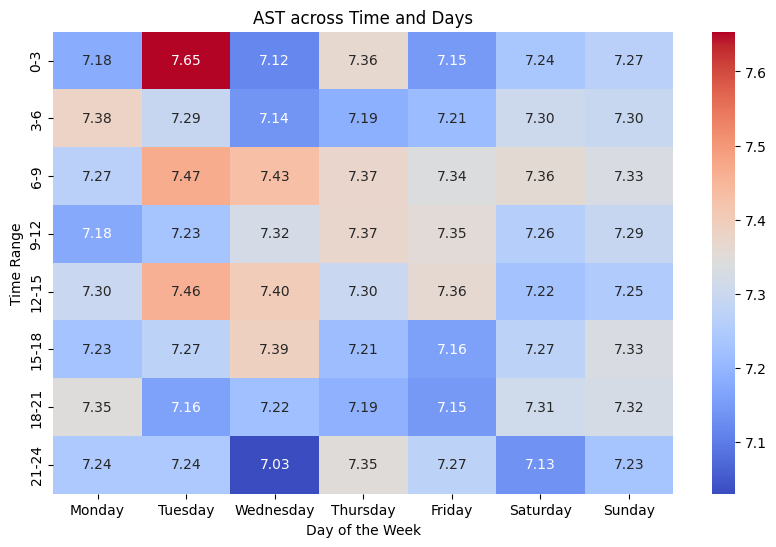

In [ ]:
# Define time intervals (0-3, 3-6, ..., 21-24) for dividing the 24 hours of the day
time_array = [(0, 3), (3, 6), (6, 9), (9, 12), (12, 15), (15, 18), (18, 21), (21, 24)]

# Define days of the week
day_array = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

arr2 = []

for i in range(8):
    arr = []

    for j in range(7):
        a = calls[
            (calls['hour'] >= time_array[i][0]) & (calls['hour'] < time_array[i][1]) & (calls['day'] == day_array[j])
        ]['speed_to_answer_time (in minutes)'].mean()
        arr.append(a)
    arr2.append(arr)

# Create a DataFrame from arr2, with columns as day names and rows as time intervals
call_volume_ast = pd.DataFrame(arr2, columns=day_array)

# Set the index of the DataFrame to represent time intervals as strings (e.g., "0-3", "3-6", ...)
call_volume_ast.index = [f'{start}-{end}' for start, end in time_array]

#Plotting a heat map for AST
plt.figure(figsize=(10,6))
sns.heatmap(call_volume_ast, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('AST across Time and Days')
plt.ylabel('Time Range')
plt.xlabel('Day of the Week')
plt.show()


# AHT on Different Days and at Different Time Intervals

In [ ]:
time_array = [(0,3),(3,6),(6,9),(9,12),(12,15),(15,18),(18,21),(21,24)]
day_array = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
arr2 = []  # Initialize arr2 as an empty list

for i in range(8):
    arr = []  # Move arr initialization here
    for j in range(7):
        # Count call IDs based on the hour and day conditions
        a = calls[(calls['hour'] >= time_array[i][0]) & (calls['hour'] < time_array[i][1]) & (calls['day'] == day_array[j])]['handling_time'].mean()
        arr.append(a)

    # Append the arr list to arr2 after each inner loop completes
    arr2.append(arr)

arr2  # Output arr2 to check the final result

call_volume_aht = pd.DataFrame(arr2, columns=day_array,)
call_volume_aht.index = [f'{start}-{end}' for start, end in time_array]


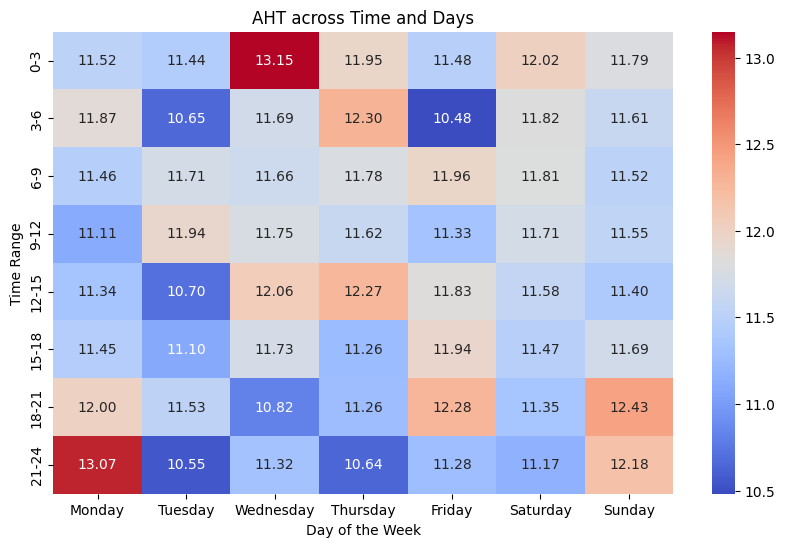

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(call_volume_aht, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('AHT across Time and Days')
plt.ylabel('Time Range')
plt.xlabel('Day of the Week')
plt.show()


The heatmap illustrating Average Speed to Answer (AST) and Average Handling Time (AHT) across different times and days indicates a remarkable consistency, suggesting that these metrics do not significantly depend on the time of day or the specific day of the week. This observation reveals that regardless of whether it’s morning, afternoon, or evening, and irrespective of the weekday or weekend, the performance in terms of answering calls and handling customer inquiries remains relatively stable.

Such consistency may imply that the airline's customer service operations are well-structured and efficient, allowing for a steady level of service across various time periods. This stability can be attributed to effective staffing strategies and well-trained personnel who are capable of managing calls uniformly, regardless of peak or off-peak hours. Additionally, it suggests that customer needs and issues remain fairly predictable throughout the week, enabling the airline to maintain a steady workflow in its call center operations.

# **Analysing Sentiments Data**

 Sentiment also matters; calls where customers express frustration or confusion may take more time to resolve, impacting AHT.

In [ ]:
st=pd.read_csv('/content/drive/My Drive/United_Airlines_Copy/Copy_sentiment.csv')

In [ ]:
# merge between sentiments and calls

In [ ]:
calls_st=pd.merge(calls,st,on='call_id')
calls_st


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handling_time,speed_to_answer_time (in minutes),hour,day,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0,23,Thursday,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0,0,Thursday,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0,23,Thursday,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0,0,Thursday,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0,0,Thursday,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,28.0,9.0,23,Sunday,413148,calm,calm,0.05,0.34
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,8.0,3.0,23,Sunday,980156,calm,frustrated,0.03,0.22
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,6.0,6.0,23,Sunday,616988,calm,polite,0.05,0.42
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,4.0,6.0,23,Sunday,161354,neutral,polite,-0.07,0.13


# Average Handling Time by Customer and Agent Tone

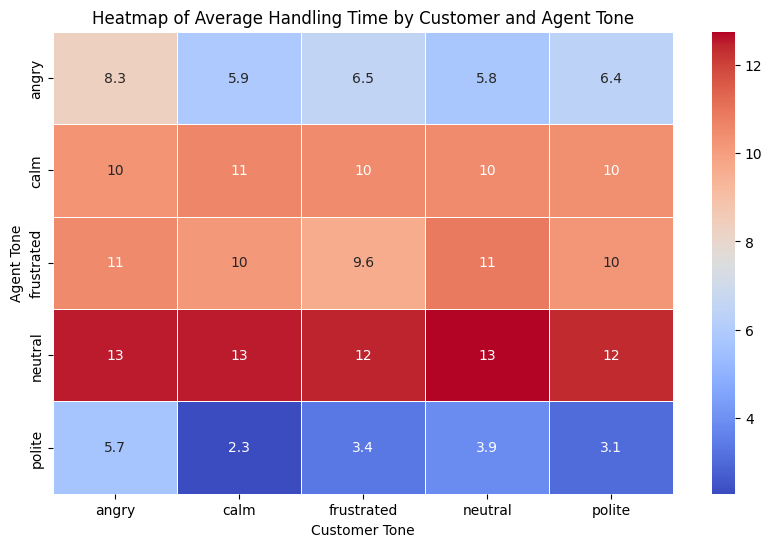

In [ ]:
# Assuming a_c_tone_aht is already defined as follows:
a_c_tone = calls_st.groupby(['customer_tone', 'agent_tone'])['handling_time'].mean()
a_c_tone_aht = pd.DataFrame(a_c_tone)

# Reset the index of the DataFrame to work with it
a_c_tone_aht = a_c_tone_aht.reset_index()

# Pivot the DataFrame for heatmap representation
pivot_data = a_c_tone_aht.pivot_table(columns='customer_tone', index='agent_tone', values='handling_time')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Average Handling Time by Customer and Agent Tone')
plt.ylabel('Agent Tone')
plt.xlabel('Customer Tone')
plt.show()

Insights:
The heatmap indicates a significant variance in handling times depending on the combination of customer and agent tones. It appears that interactions with different emotional tones lead to differing durations of calls.

We can see consistency on the bais of agent tone in the heatmap, let's look at the insights from this.

Neutral Agent Tone: When the agent's tone is neutral, the handling time is consistently the highest across almost all customer tones, peaking at 13 minutes. This suggests that agents with a neutral tone may not be as effective in de-escalating or managing the call efficiently, leading to longer handling times.

Polite Agent Tone: Agents with a polite tone tend to have the shortest handling times, especially when dealing with polite or calm customers. For example, the handling time is as low as 2.3 minutes when both the agent and customer are calm, and 5.7 minutes with angry customers. This indicates that polite agents are better at resolving calls quickly, especially with calmer customers.

Frustrated Agent Tone: Interestingly, frustrated agents don't seem to show a clear positive or negative trend. Handling times hover around 10-11 minutes regardless of the customer’s tone, which might suggest that frustration from agents leads to consistent inefficiency across all types of interactions.

Calm Agent Tone: Agents with a calm tone have moderately high handling times, around 10-11 minutes, regardless of customer tone. Although better than neutral agents, calm agents still have room to improve compared to polite agents.

Conclusion:
The heatmap illustrates that managing customer emotions through effective agent tone can have a direct impact on handling times. Agents should aim to maintain a calm and polite demeanor, especially when dealing with frustrated or angry customers, to enhance efficiency in call handling and potentially improve overall customer satisfaction. This analysis emphasizes the importance of emotional intelligence in customer service interactions.

# Average Handling Time by Sentiment and Silence Percentage

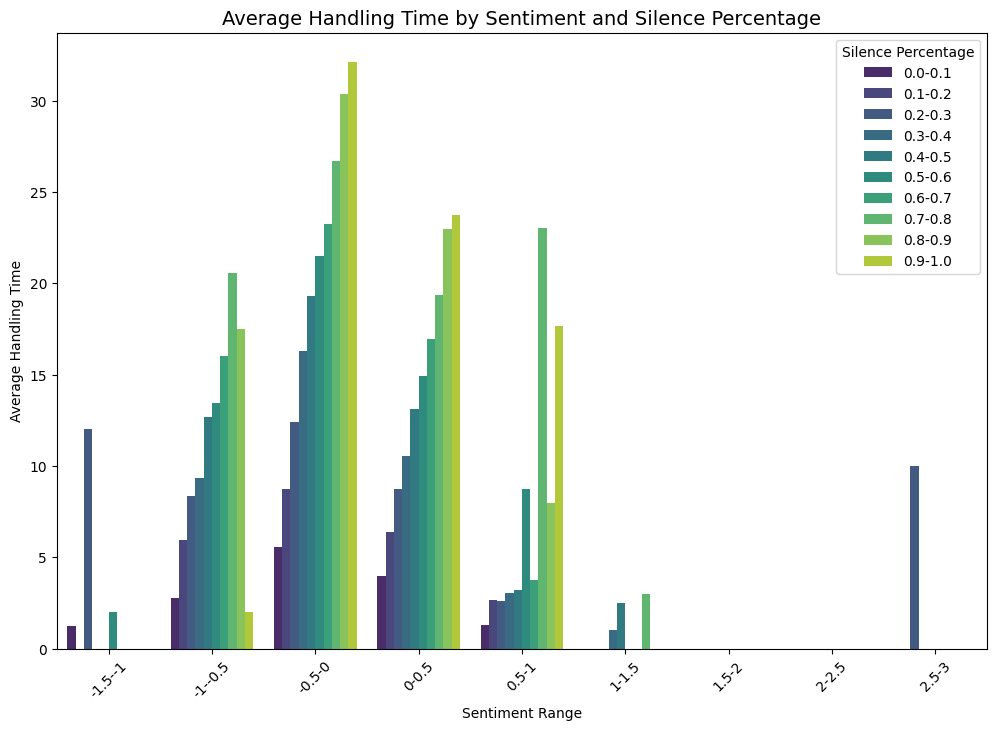

In [ ]:
sentiment_array = [(-1.5,-1), (-1,-0.5), (-0.5,0), (0,0.5), (0.5,1), (1,1.5), (1.5,2), (2,2.5), (2.5,3)]
percentage_array = [(0.0,0.1), (0.1,0.2), (0.2,0.3), (0.3,0.4), (0.4,0.5), (0.5,0.6), (0.6,0.7), (0.7,0.8), (0.8,0.9), (0.9,1.0)]

arr2 = []  # Initialize arr2 to store the results

for i in range(9):  # Loop over sentiment ranges
    arr = []
    for j in range(10):  # Loop over percentage ranges
        # Calculate the average handling time based on conditions
        a = calls_st[(calls_st['average_sentiment'] >= sentiment_array[i][0]) &
                     (calls_st['average_sentiment'] < sentiment_array[i][1]) &
                     (calls_st['silence_percent_average'] >= percentage_array[j][0]) &
                     (calls_st['silence_percent_average'] < percentage_array[j][1])
                    ]['handling_time'].mean()
        arr.append(a)

    arr2.append(arr)  # Append the results for this sentiment range

# Create a DataFrame from the results
aht_sentiments = pd.DataFrame(arr2, columns=[f'{start}-{end}' for start, end in percentage_array])
aht_sentiments.index = [f'{start}-{end}' for start, end in sentiment_array]

# Display the DataFrame
aht_sentiments_filled = aht_sentiments.fillna(0)

# Option 2: Fill null values with the mean of the column
aht_sentiments_filled = aht_sentiments.fillna(aht_sentiments.mean())

# Option 3: Interpolation to handle missing values smoothly
aht_sentiments_filled = aht_sentiments.interpolate()

# Reset the DataFrame for better visualization
aht_sentiments_melt = aht_sentiments.reset_index().melt(id_vars='index', var_name='Silence Percentage', value_name='Handling Time')

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='Handling Time', hue='Silence Percentage', data=aht_sentiments_melt, palette='viridis')

# Add labels and title
plt.title('Average Handling Time by Sentiment and Silence Percentage', fontsize=14)
plt.xlabel('Sentiment Range')
plt.ylabel('Average Handling Time')
plt.xticks(rotation=45)

# Show the plot
plt.show()


The above bar graph visualizes the relationship between Average Handling Time (AHT), Sentiment, and Silence Percentage during calls. Here's a detailed insight:

High Silence Percentage Leads to Higher AHT:

Calls where the silence percentage is between 0.8 to 1.0 (the yellow-green bars) show significantly higher handling times, peaking above 30 minutes. This suggests that prolonged silences during a call contribute to longer handling times, likely because of miscommunication, indecision, or hesitation during the conversation.
Lower Silence Percentage Results in Shorter Handling Times:

Calls with a lower silence percentage (0.0-0.1) tend to have the shortest handling times, generally below 10 minutes. This indicates that more fluid and continuous conversations lead to quicker resolutions.
Mid-Range Silence (0.4-0.6) Has Mixed Results:

For silence percentages in the range of 0.4 to 0.6 (green to light green bars), there is variability in handling times. This suggests that moderate pauses during calls can either help or hinder the flow of conversation, depending on the context or sentiment of the discussion.
Sentiment's Influence on AHT:

The graph doesn't directly show sentiment labels, but the different segments of the bars likely represent varying levels of customer sentiment. It is clear that sentiment, combined with silence, impacts how long agents take to handle calls, with more negative or uncertain tones likely associated with higher silence percentages and, subsequently, higher handling times.
In summary, reducing silence during calls can help decrease the Average Handling Time, while higher silence percentages can significantly increase the duration of the calls, possibly due to unclear communication or issues with resolving customer concerns quickly.

# **Reasons of Calling**

 Lastly, the reason for calling can influence how long a call lasts; some issues naturally require more discussion than others.

In [ ]:
reason=pd.read_csv('/content/drive/My Drive/United_Airlines_Copy/Copy_reason.csv')
reason

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [ ]:
#Find Unique reasons for Calls
unique_reasons = reason['primary_call_reason'].unique()

# Convert to a list for better readability
unique_reasons_list = unique_reasons.tolist()

print(unique_reasons_list)

['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating', 'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight', 'Check In', 'Other  Topics', 'Communications', 'Schedule Change', 'Products & Services', 'IRROPS  ', 'Digital   Support', 'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage', 'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ', 'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ', 'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ', 'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ', 'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In', 'Products and Services', 'Check-In  ', 'Other Topics', 'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support', 'Digital Support  ', 'Voluntary Cancel  ', 'Products and Services  ', 'Traveler Updates  ', 'Traveler   Updates', 'Digital  Support', 'Mileage  Plus', 'Voluntary  Change']


The reasons listed above shows that there is discrepancy in reasins, that is same reason has been represented differently. Finding out similarity index for each element and replacing it with original element will remove the discrepancies.

In [ ]:
import pandas as pd

# Load your CSV file
reason = pd.read_csv('/content/drive/My Drive/United_Airlines_Copy/Copy_reason.csv')

# Step 1: Trim whitespace and lower the case
reason['primary_call_reason'] = reason['primary_call_reason'].str.strip().str.lower()

# Step 2: Define a reference list of standard call reasons (capitalized)
reference_list = [
    'Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
    'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post-Flight',
    'Check-In', 'Other Topics', 'Communications', 'Schedule Change',
    'Products and Services', 'Digital Support', 'Disability',
    'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'
]

# Create a dictionary for reference list for fast lookup
reference_dict = {item.lower(): item for item in reference_list}

def find_closest_match(reason):
    max_similarity = 0
    closest_match = reason  # Default to original if no match found

    # Compare with each reference item
    for ref in reference_dict.keys():
        # Calculate the similarity score
        similarity = len(set(reason.split()) & set(ref.split()))  # Count common words
        if similarity > max_similarity:
            max_similarity = similarity
            closest_match = reference_dict[ref]  # Use the original case from the reference list

    # Return the closest match if it meets the criteria; otherwise, return original
    return closest_match if max_similarity > 0 else reason.capitalize()


reason['standardized_reason'] = reason['primary_call_reason'].apply(find_closest_match)

# Create a new DataFrame to hold cleaned data
reason_clean = reason[['call_id', 'standardized_reason']]
reason_clean


,call_id,standardized_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [ ]:
unique_reasons_clean = reason_clean['standardized_reason'].unique()

# Convert to a list for better readability
unique_reasons_list_clean = unique_reasons_clean.tolist()

print(unique_reasons_list_clean)

['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating', 'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post flight', 'Check in', 'Other Topics', 'Communications', 'Schedule Change', 'Products and Services', 'Digital Support', 'Disability', 'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC', 'Post-Flight', 'Check-In']


In [ ]:
calls_reason=pd.merge(calls,reason_clean,on='call_id')


In [ ]:
reason_ht = pd.DataFrame(calls_reason.groupby(['standardized_reason'])['handling_time'].mean())
reason_ht

,handling_time
standardized_reason,
Baggage,5.560734
Booking,7.128934
Check in,9.254545
Check-In,9.648453
Checkout,16.947564
Communications,13.778646
Digital Support,6.204898
Disability,4.868486
ETC,16.048319


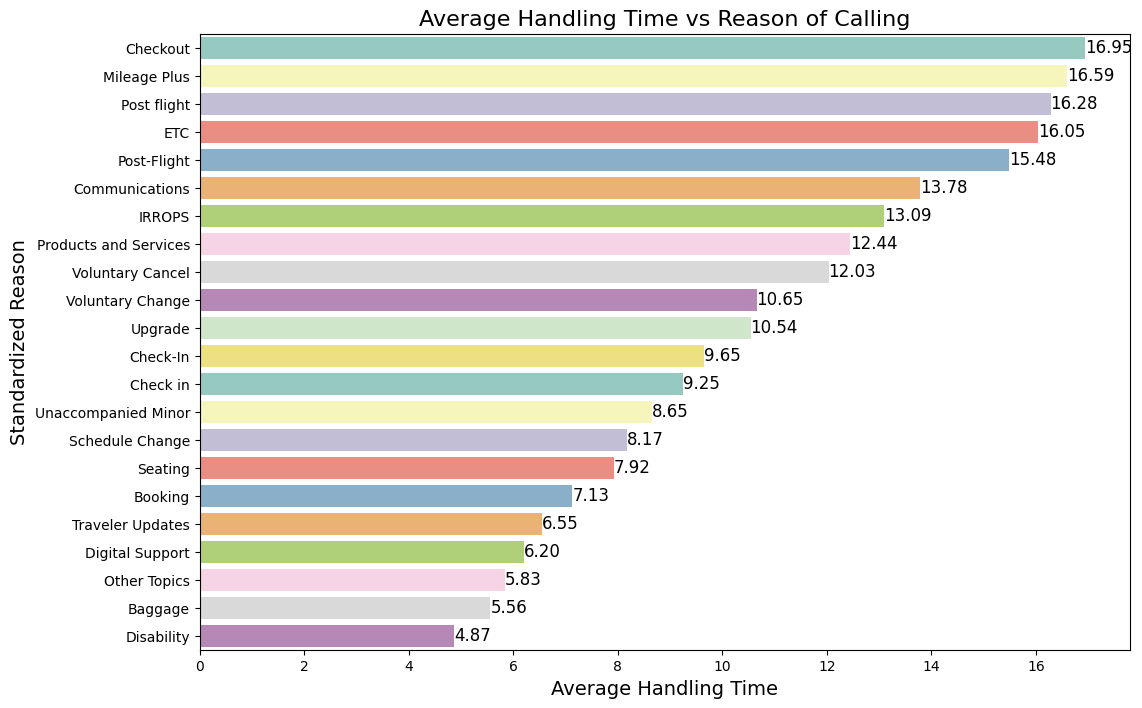

In [ ]:



reason_ht = reason_ht.sort_values(by='handling_time', ascending=False)

reason_ht.reset_index(inplace=True)

plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='handling_time', y='standardized_reason', data=reason_ht, hue='standardized_reason', palette='Set3', dodge=False, legend=False)

for index, value in enumerate(reason_ht['handling_time']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12)


plt.title('Average Handling Time vs Reason of Calling', fontsize=16)
plt.xlabel('Average Handling Time', fontsize=14)
plt.ylabel('Standardized Reason', fontsize=14)

plt.show()


In [ ]:
reason_st = pd.DataFrame(calls_reason.groupby(['standardized_reason'])['speed_to_answer_time (in minutes)'].mean())
reason_st.reset_index()

,standardized_reason,speed_to_answer_time (in minutes)
0,Baggage,9.034958
1,Booking,4.003792
2,Check in,6.036364
3,Check-In,5.903884
4,Checkout,12.078390
5,Communications,3.999479
6,Digital Support,8.428571
7,Disability,8.392060
8,ETC,9.071429
9,IRROPS,6.001352


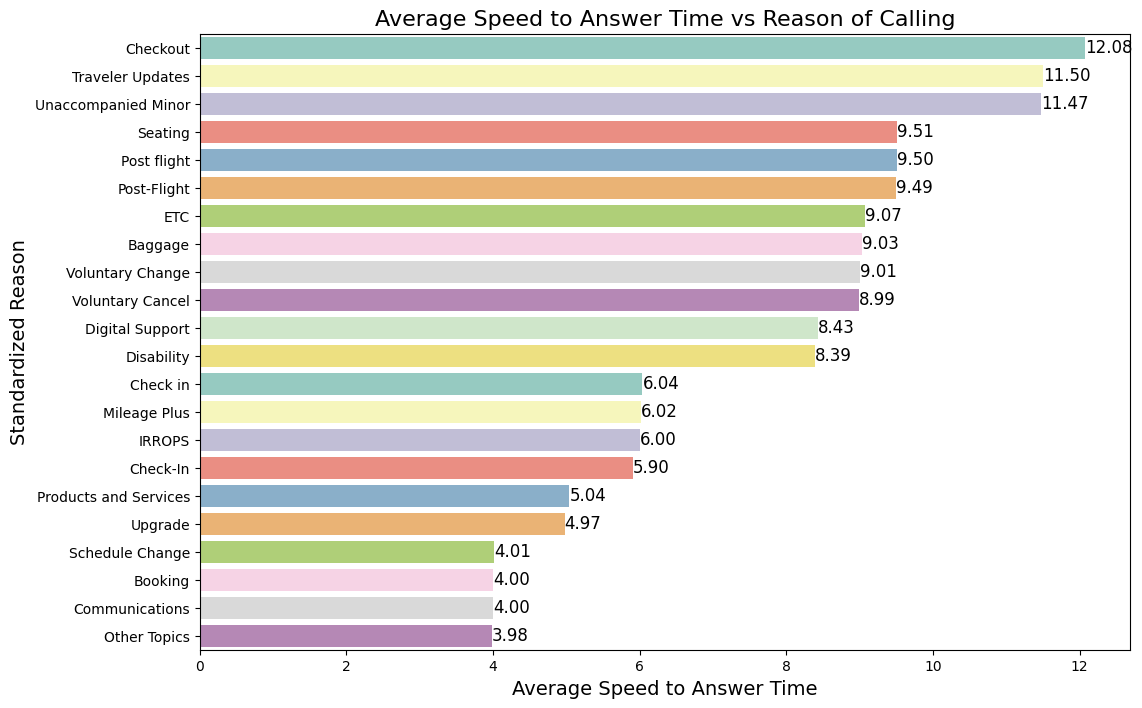

In [ ]:
reason_st = reason_st.sort_values(by='speed_to_answer_time (in minutes)', ascending=False)

reason_st.reset_index(inplace=True)

plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='speed_to_answer_time (in minutes)', y='standardized_reason', data=reason_st, hue='standardized_reason', palette='Set3', dodge=False, legend=False)

for index, value in enumerate(reason_st['speed_to_answer_time (in minutes)']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12)


plt.title('Average Speed to Answer Time vs Reason of Calling', fontsize=16)
plt.xlabel('Average Speed to Answer Time', fontsize=14)
plt.ylabel('Standardized Reason', fontsize=14)

plt.show()


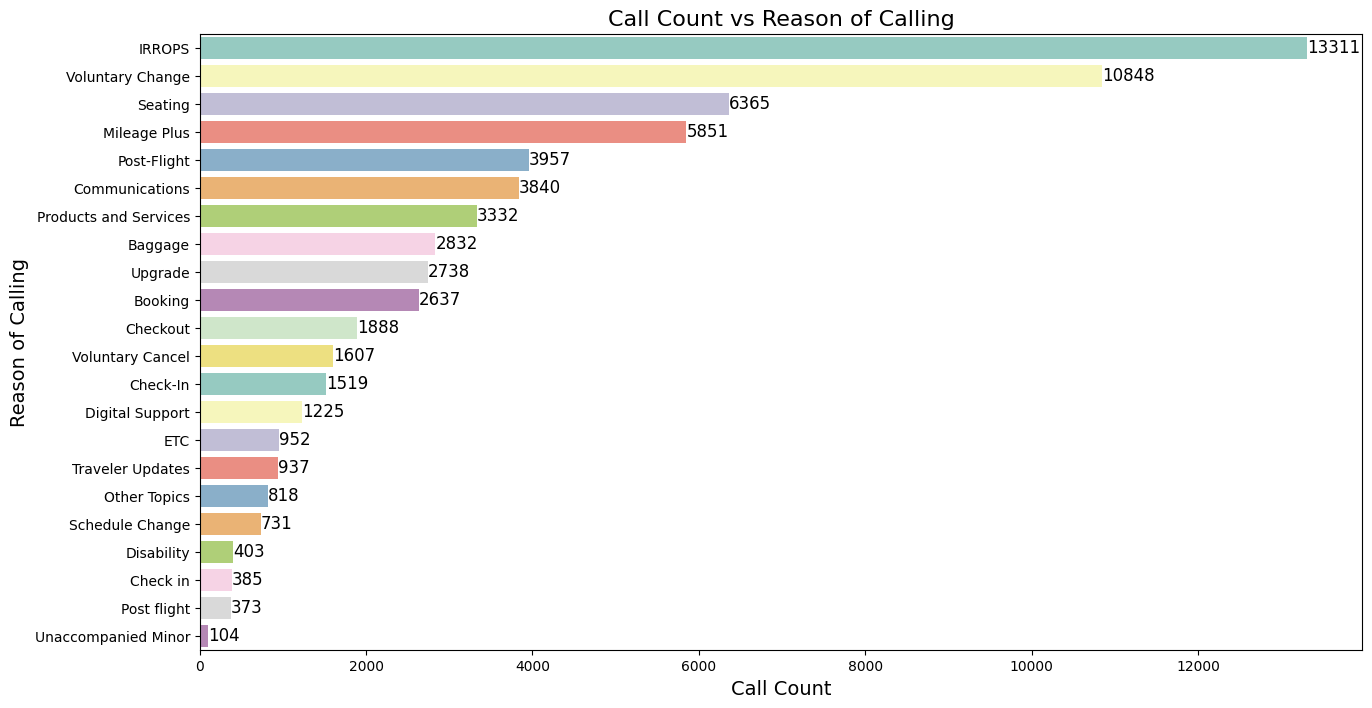

In [ ]:
# Calculate number of calls grouped by standardized_reason
reason_count = pd.DataFrame(calls_reason.groupby(['standardized_reason'])['call_id'].count())


reason_count = reason_count.sort_values(by='call_id', ascending=False)

reason_count.reset_index(inplace=True)

plt.figure(figsize=(15, 8))  # Set the figure size
sns.barplot(x='call_id', y='standardized_reason', data=reason_count, palette='Set3', dodge=False)

for index, value in enumerate(reason_count['call_id']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=12)

plt.title('Call Count vs Reason of Calling', fontsize=16)
plt.xlabel('Call Count', fontsize=14)
plt.ylabel('Reason of Calling', fontsize=14)

plt.show()


In [ ]:

# Merge the two DataFrames on the 'standardized_reason' column
merged_data = pd.merge(reason_ht, reason_count, on='standardized_reason', how='inner')

merged_data.columns = ['standardized_reason', 'avg_handling_time', 'call_count']

# Sort the merged data by call count and average handling time
merged_data_sorted = merged_data.sort_values(by=['call_count', 'avg_handling_time'], ascending=[False, False])

# Display the top reasons with high call count and handling time
print(merged_data_sorted)


      standardized_reason  avg_handling_time  call_count
6                  IRROPS          13.085268       13311
9        Voluntary Change          10.652563       10848
15                Seating           7.916575        6365
1            Mileage Plus          16.592890        5851
4             Post-Flight          15.479404        3957
5          Communications          13.778646        3840
7   Products and Services          12.442677        3332
20                Baggage           5.560734        2832
10                Upgrade          10.539080        2738
16                Booking           7.128934        2637
0                Checkout          16.947564        1888
8        Voluntary Cancel          12.031114        1607
11               Check-In           9.648453        1519
18        Digital Support           6.204898        1225
3                     ETC          16.048319         952
17       Traveler Updates           6.553895         937
19           Other Topics      

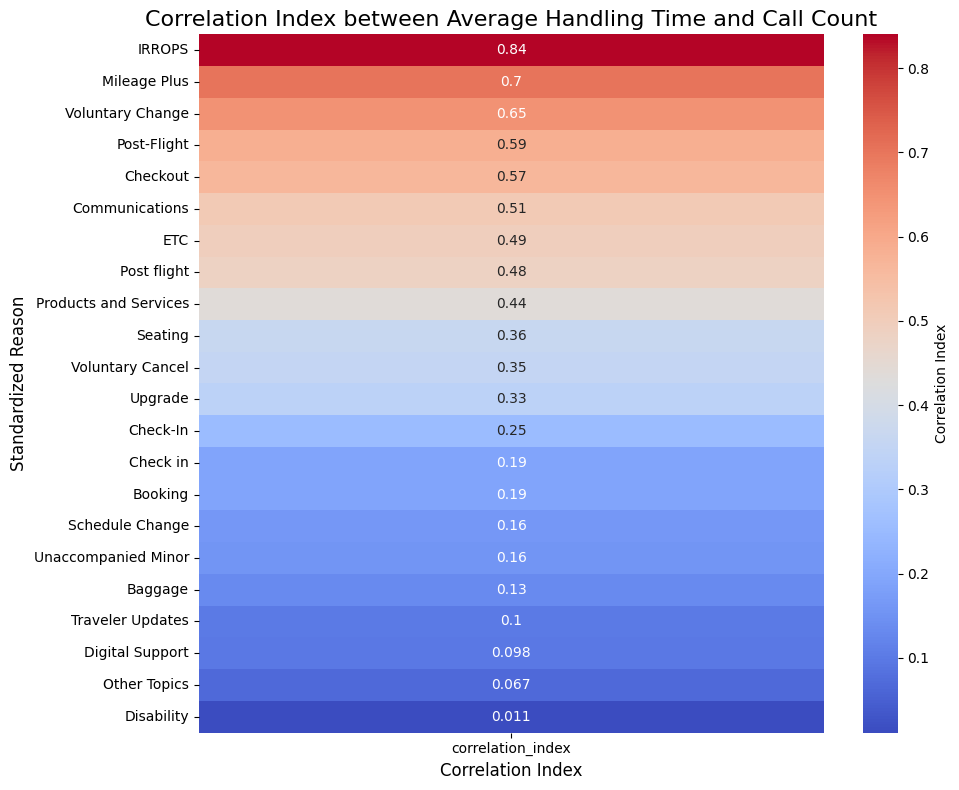

In [ ]:
# Creating DataFrame
df = pd.DataFrame(merged_data_sorted)

# Normalization of AHT and Call Count
df['normalized_AHT'] = (df['avg_handling_time'] - df['avg_handling_time'].min()) / (df['avg_handling_time'].max() - df['avg_handling_time'].min())
df['normalized_call_count'] = (df['call_count'] - df['call_count'].min()) / (df['call_count'].max() - df['call_count'].min())

# Calculating correlation index
df['correlation_index'] = (df['normalized_AHT'] + df['normalized_call_count']) / 2
df_sorted = df.sort_values(by='correlation_index', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df_sorted.pivot_table(index='standardized_reason', values='correlation_index')

heatmap_data_sorted = heatmap_data.sort_values(by='correlation_index', ascending=False)
sns.heatmap(heatmap_data_sorted, annot=True, cmap="coolwarm", cbar_kws={"label": "Correlation Index"})


plt.title('Correlation Index between Average Handling Time and Call Count', fontsize=16)
plt.xlabel('Correlation Index', fontsize=12)
plt.ylabel('Standardized Reason', fontsize=12)

plt.tight_layout()
plt.show()


Based on the correlation index heatmap between Average Handling Time (AHT) and Call Count, here are the insights:
1. **Strong Positive Correlation**:   - IRROPS has the highest correlation index of 0.84, indicating that as the number of calls regarding IRROPS increases, the AHT significantly rises, likely due to the complexity of issues handled.
   - Mileage Plus and Voluntary Change also show strong correlations at 0.70 and 0.65, respectively, suggesting that these topics tend to lead to longer handling times as call volumes increase.

2. **Moderate Positive Correlation**:   - Post-Flight (0.59) and Checkout (0.57) exhibit moderate correlations, implying that calls related to these areas also result in longer handling times, possibly due to the nature of inquiries that require detailed responses.
   - Communications (0.51) and ETC (0.49) further support the trend, indicating that higher call counts in these areas correspond with increased handling times.

3. **Lower Correlation**:   - Categories like Booking (0.19), Schedule Change (0.16), and Disability (0.011) show minimal correlation with AHT, suggesting that these inquiries may be more straightforward or quicker to resolve.

4. **Implications for Resource Allocation**:
   - The high correlation values for certain categories like IRROPS and Mileage Plus indicate the need for specialized agents or resources in these areas to improve efficiency and reduce handling times.   - Conversely, lower correlation topics may benefit from streamlined processes, as they do not significantly affect overall handling times.

In summary, focusing on the topics with the highest correlation to AHT can enhance operational efficiency, allowing for quicker resolutions of complex inquiries while optimizing resource allocation.

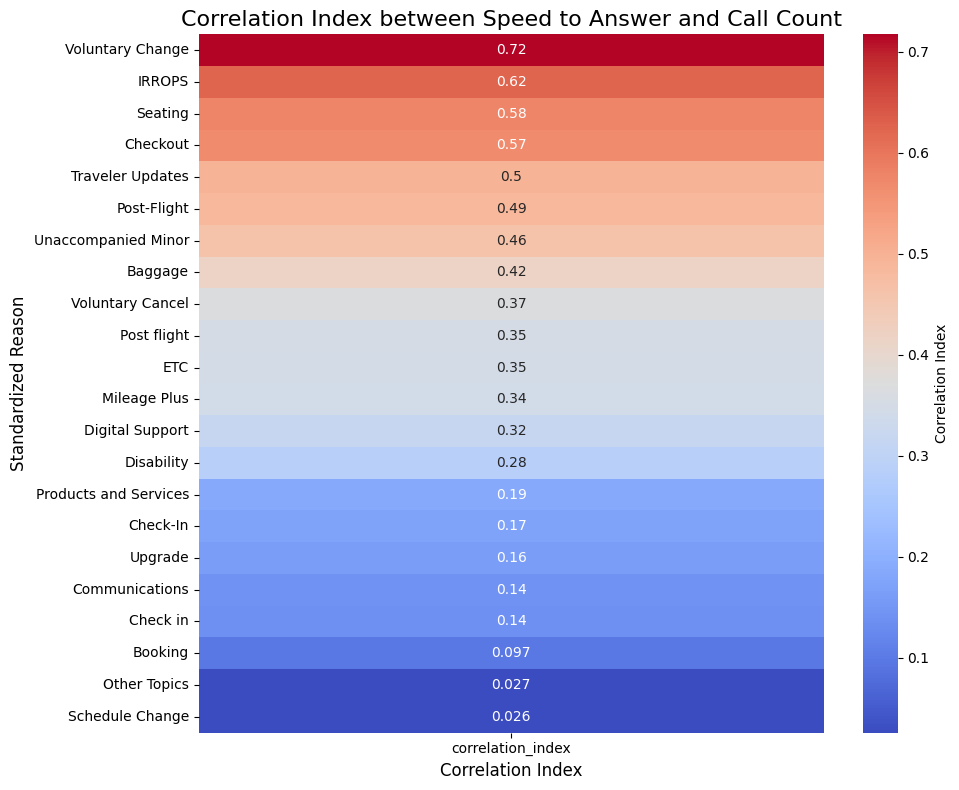

In [ ]:
# Merge the two DataFrames on the 'standardized_reason' column
merged_data_1 = pd.merge(reason_st, reason_count, on='standardized_reason', how='inner')

# Rename columns for consistency
merged_data_1.columns = ['standardized_reason', 'avg_speed_to_answer_time', 'call_count']

# Sort the merged data by call count and average speed to answer time
merged_data_sorted_1 = merged_data_1.sort_values(by=['call_count', 'avg_speed_to_answer_time'], ascending=[False, False])

# Creating DataFrame for normalization and correlation
df_1 = pd.DataFrame(merged_data_sorted_1)

# Normalization of AST (Average Speed to Answer Time) and Call Count
df_1['normalized_AST'] = (df_1['avg_speed_to_answer_time'] - df_1['avg_speed_to_answer_time'].min()) / (df_1['avg_speed_to_answer_time'].max() - df_1['avg_speed_to_answer_time'].min())
df_1['normalized_call_count'] = (df_1['call_count'] - df_1['call_count'].min()) / (df_1['call_count'].max() - df_1['call_count'].min())

# Calculating correlation index as the average of normalized AST and call count
df_1['correlation_index'] = (df_1['normalized_AST'] + df_1['normalized_call_count']) / 2

# Sort the DataFrame by correlation index
df_1_sorted = df_1.sort_values(by='correlation_index', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 8))

# Prepare the heatmap data (set 'standardized_reason' as the index)
heatmap_data_1 = df_1_sorted.pivot_table(index='standardized_reason', values='correlation_index')

# Sort the heatmap data by correlation index
heatmap_data_sorted_1 = heatmap_data_1.sort_values(by='correlation_index', ascending=False)

# Generate the heatmap
sns.heatmap(heatmap_data_sorted_1, annot=True, cmap="coolwarm", cbar_kws={"label": "Correlation Index"})

# Add titles and labels
plt.title('Correlation Index between Speed to Answer and Call Count', fontsize=16)
plt.xlabel('Correlation Index', fontsize=12)
plt.ylabel('Standardized Reason', fontsize=12)

# Tight layout for better presentation
plt.tight_layout()
plt.show()




Based on the correlation index heatmap between Speed to Answer (AST) and Call Count, here are the insights:

1. **Strong Positive Correlation**:   - Voluntary Change leads with a correlation index of 0.72, indicating that an increase in call volume for this reason is strongly associated with faster response times, possibly due to simpler inquiries.

   - IRROPS follows closely at 0.62, suggesting that calls related to IRROPS are also answered quickly, likely because they are prioritized.

2. **Moderate Positive Correlation**:   - Seating (0.58) and Checkout (0.57) demonstrate moderate correlations, indicating that these inquiries tend to be resolved quickly when call counts rise.
   - Traveler Updates (0.50) and Post-Flight (0.49) further support the trend, showing that higher call volumes in these areas are associated with quicker response times.

3. **Lower Correlation**:   - Categories like Booking (0.097) and Schedule Change (0.026) exhibit minimal correlation with AST, suggesting these inquiries are more complex or require more time to address, leading to slower response times.

4. **Implications for Call Center Operations**:
   - The strong correlation for Voluntary Change and IRROPS indicates the need for efficient handling procedures in these areas, potentially improving overall performance metrics.   - In contrast, topics with lower correlations may require additional resources or improved processes to enhance response times.

In summary, focusing on the areas with high correlation to AST can lead to improvements in customer experience and operational efficiency, while addressing the complexities of less correlated inquiries may help reduce wait times.


# Percentage Difference between AHT for Most Frequent and Least Frequent Call Reasons

In [ ]:
# Get the AHT for the most frequent and least frequent reasons
most_frequent_aht = reason_ht['handling_time'].max()  # Max AHT
least_frequent_aht = reason_ht['handling_time'].min()  # Min AHT

# Calculate the percentage difference
percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100

# Output the result
print(f"Percentage difference in AHT between the most frequent and least frequent call reasons: {percentage_difference:.2f}%")


Percentage difference in AHT between the most frequent and least frequent call reasons: 248.11%


# **Analyzing Transcript**

By analyzing the transcripts, we can identify specific, detailed reasons for recurring issues that customers frequently face. Understanding these reasons can help us address these problems by offering self-service solutions through the IVR system.

In [ ]:
calls_reason

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handling_time,speed_to_answer_time (in minutes),hour,day,standardized_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0,23,Thursday,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0,0,Thursday,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0,23,Thursday,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0,0,Thursday,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0,0,Thursday,Seating
...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,10.0,6.0,23,Sunday,Mileage Plus
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,28.0,9.0,23,Sunday,Post flight
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,8.0,3.0,23,Sunday,Upgrade
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,6.0,6.0,23,Sunday,Upgrade


In [ ]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords

# Download common stopwords in english
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Add custom stop words
custom_stop_words = ['flight', 'agent', 'customer', 'let', 'change', 'like', 'help', 'would', 'thank',
                     'united', 'calling', 'okay', 'typing', 'get', 'next', 'work', 'day', 'take',
                     'time', 'yeah', 'really', 'need', 'know', 'one', 'call', 'thanks','chicago','look','looks','please','today']

stop_words.update(custom_stop_words)

# Get unique reasons
unique_reasons = calls_reason['standardized_reason'].unique()

# Initialize a dictionary to store results
top_words_per_reason = {}

# Loop through each unique reason
for reason in unique_reasons:

    filtered_df = calls_reason[calls_reason['standardized_reason'] == reason]
    all_transcripts = ' '.join(filtered_df['call_transcript'].tolist())
    words = re.findall(r'\b\w+\b', all_transcripts.lower())  # Convert to lower case and find words
    filtered_words = [word for word in words if word not in stop_words]
    word_counts = Counter(filtered_words)
    top_10_words = word_counts.most_common(10)

    # Store the results in the dictionary
    top_words_per_reason[reason] = top_10_words


for reason, top_words in top_words_per_reason.items():
    print(f"\nTop 10 words for reason '{reason}':")
    for word, count in top_words:
        print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 words for reason 'Voluntary Cancel':
could: 2284
reservation: 2252
see: 2243
make: 2187
travel: 2183
fee: 2172
good: 2058
new: 2048
check: 2042
name: 2008

Top 10 words for reason 'Booking':
fee: 3713
see: 3711
reservation: 3666
could: 3650
booked: 3636
good: 3443
new: 3422
travel: 3356
make: 3293
check: 3267

Top 10 words for reason 'IRROPS':
see: 19231
reservation: 19190
could: 18803
fee: 18202
travel: 17986
make: 17925
new: 17490
name: 17322
good: 17115
booked: 16935

Top 10 words for reason 'Upgrade':
reservation: 3886
see: 3877
could: 3858
make: 3777
fee: 3710
good: 3652
booked: 3481
name: 3473
travel: 3383
anything: 3344

Top 10 words for reason 'Seating':
could: 8984
reservation: 8862
see: 8763
make: 8593
fee: 8588
good: 8346
travel: 8109
check: 8068
booked: 7942
new: 7892

Top 10 words for reason 'Mileage Plus':
could: 8499
fee: 8403
make: 8264
see: 8247
reservation: 8193
good: 7691
travel: 7621
booked: 7578
name: 7325
check: 7275

Top 10 words for reason 'Checkout':
se

The analysis was carried out to find the top 10 words that could help identify specific sub-reasons within each main reason in the call transcripts. The goal was to spot patterns that could make it easier to classify these sub-reasons. However, even after removing common and frequently used words (like "the," "and," "with"), no clear or consistent pattern emerged.

Despite efforts to focus on unique words, the data didn't reveal any useful trends that could help distinguish between different sub-reasons. This indicates that further refinement of the approach or additional techniques may be necessary to get meaningful insights from the transcripts, which are currently out of scope due to time constraints.

# Analyzing Agent Sentiment to Optimize Agent Allocation for Specific Call Reasons


Scoring each agent based on factors like agent tone, sentiment score, and silence percentage can help calculate an overall performance score. This performance score can then be used to assign agents to calls according to the importance of the reason for the call. High-performing agents can be allocated to handle high-priority issues, ensuring that important matters are addressed more effectively.

In [ ]:
# Create a mapping dictionary for scoring each parameter and finding out agent performance score
tone_mapping = {
    'polite': 5,
    'calm':4,
    'neutral':3,
    'frustated':2,
    'angry': 1
}

sentiment_map = {
    (-2, -1): 1,
    (-1, 0): 2,
    (0, 1): 3,
    (1, 2): 4,
    (2, 3): 5
}

silence_percentage_map={
    (0.0,0.2):1,
    (0.2,0.4):2,
    (0.4,0.6):3,
    (0.6,0.8):4,
    (0.8,1):5
}

# Replacing null values for tone score with 2.5
st['tone_score']=st['agent_tone'].map(tone_mapping).fillna(2.5)



In [ ]:
# Custom function to map sentiment values to sentiment scores
def get_sentiment_score(value):
    for key, score in sentiment_map.items():
        if key[0] <= value < key[1]:  # Check if value is within the range (key)
            return score
    return 2.5  # Default score if no match is found

# Use apply() to map ranges
st['sentiment_score'] = st['average_sentiment'].apply(get_sentiment_score)

# Custom function to map sentiment values to sentiment scores
def get_silence_percentage_score(value):
    for key, score in silence_percentage_map.items():
        if key[0] <= value < key[1]:  # Check if value is within the range (key)
            return score
    return 2.5  # Default score if no match is found

# Use apply() to map ranges
st['silence_percentage_score'] = st['silence_percent_average'].apply(get_silence_percentage_score)

st

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,tone_score,sentiment_score,silence_percentage_score
0,4667960400,963118,neutral,angry,-0.04,0.39,3.0,2.0,2
1,1122072124,519057,calm,neutral,0.02,0.35,4.0,3.0,2
2,6834291559,158319,neutral,polite,-0.13,0.32,3.0,2.0,2
3,2266439882,488324,neutral,frustrated,-0.20,0.20,3.0,2.0,2
4,1211603231,721730,neutral,polite,-0.05,0.35,3.0,2.0,2
...,...,...,...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34,4.0,3.0,2
71806,8865997781,980156,calm,frustrated,0.03,0.22,4.0,3.0,2
71807,8019240181,616988,calm,polite,0.05,0.42,4.0,3.0,3
71808,8332067080,161354,neutral,polite,-0.07,0.13,3.0,2.0,1


In [ ]:
st['agent_score']=((0.4*st['tone_score'] + 0.3*st['sentiment_score'] + 0.3*st['silence_percentage_score'])/5) #Giving more importance to tone score because handling time heavliy depends on agent tone.
st

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,tone_score,sentiment_score,silence_percentage_score,agent_score
0,4667960400,963118,neutral,angry,-0.04,0.39,3.0,2.0,2,0.48
1,1122072124,519057,calm,neutral,0.02,0.35,4.0,3.0,2,0.62
2,6834291559,158319,neutral,polite,-0.13,0.32,3.0,2.0,2,0.48
3,2266439882,488324,neutral,frustrated,-0.20,0.20,3.0,2.0,2,0.48
4,1211603231,721730,neutral,polite,-0.05,0.35,3.0,2.0,2,0.48
...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34,4.0,3.0,2,0.62
71806,8865997781,980156,calm,frustrated,0.03,0.22,4.0,3.0,2,0.62
71807,8019240181,616988,calm,polite,0.05,0.42,4.0,3.0,3,0.68
71808,8332067080,161354,neutral,polite,-0.07,0.13,3.0,2.0,1,0.42


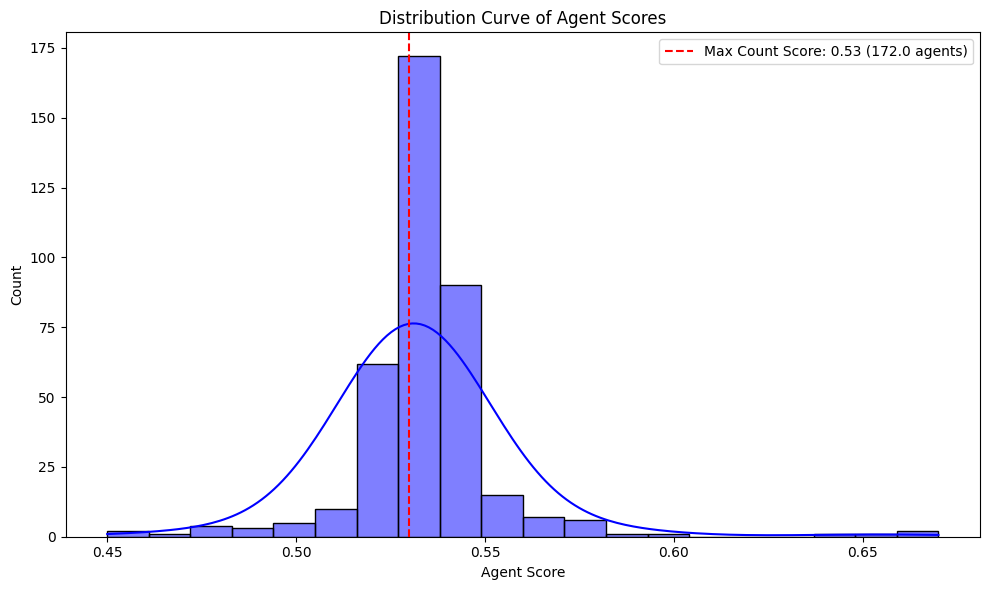

In [ ]:
# Finding mean of agent scores for each agent

score_distribution = a.groupby('agent_score')['agent_id'].count().reset_index()
score_distribution.columns = ['agent_score', 'count']

# Find the maximum count and corresponding agent score
max_count_row = score_distribution.loc[score_distribution['count'].idxmax()]
max_score = max_count_row['agent_score']
max_count = max_count_row['count']

# Plotting the distribution curve
plt.figure(figsize=(10, 6))

x = score_distribution['agent_score']
y = score_distribution['count']

# Instead of weights, we use a histogram to create the KDE
sns.histplot(x=x, weights=y, bins=len(score_distribution), kde=True, color='blue', alpha=0.5)

# Mark the maximum count
plt.axvline(x=max_score, color='red', linestyle='--', label=f'Max Count Score: {max_score} ({max_count} agents)')

# Adding titles and labels
plt.title('Distribution Curve of Agent Scores')
plt.xlabel('Agent Score')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()



Based on the distribution curve of agent scores, agents with higher scores are more capable and effective. Therefore, they should be allocated to more critical call reasons, ensuring that complex inquiries are handled efficiently and enhancing overall service quality. This strategy can help improve customer satisfaction and operational performance.